# laRegister
laRegister creates an affine transfromation matrix from two spectrally separated datasets of fiducial marker molecules. It is part of the locAligner package.

by

Sebastian Malkusch

2019-04-16

single molecule biophysics,
Goethe-University Frankfurt, Germany

malkusch@chemie.uni-frankfurt.de

www.smb.uni-frankfurt.de

http://share.smb.uni-frankfurt.de
    
https://github.com/SMLMS/locAligner

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from locAligner.jupyter import laRegisterWidgets
from locAligner.data import localizations
from locAligner.data import fiducials

widgets = laRegisterWidgets.LaRegisterWidgets()
locDataSet = [localizations.SMLM_localizations(),
              localizations.SMLM_localizations()]
fiducialDataSet = fiducials.SMLM_fiducials()

laWidgets initialized


## Import Data
Import the thunderSTORM localization files (.csv) for the ficucial localizations of the 1st and the 2nd channel.

In [2]:
display(widgets.loadButton)
def loadFiducialLocalizations(event):
    widgets.clearOutput()
    display(widgets.loadButton)
    n=1
    for i in locDataSet:
        i.browseFile()
        i.updateNames()
        i.importData()
        print("Channel %i loaded from: %s" % (n, i.fileName))
        n += 1
    fiducialDataSet.fileName = locDataSet[1].fileName
    fiducialDataSet.updateNames()
        
widgets.loadButton.on_click(loadFiducialLocalizations)

Button(description='load', icon='check', style=ButtonStyle(), tooltip='Click me')

returning fileName
Channel 1 loaded from: E:/Lehre/Praktikanten/Trung/beads/locs_left.csv
returning fileName
Channel 2 loaded from: E:/Lehre/Praktikanten/Trung/beads/locs_right.csv
returning fileName
set fileName


## Cluster analysis
Perform a DBSCAN clsuter analysis based upon the characteristic DBSCAN parameters
eps = maxmimal search radius
min_samples = minimal number of samples within a cluster

In [3]:
display(widgets.minSampleText, widgets.epsText, widgets.dbscanButton)

def runDBSCAN(event):
    widgets.clearOutput()
    display(widgets.minSampleText, widgets.epsText, widgets.dbscanButton)
    n=0
    for i in locDataSet:
        i.clusterLocalizations(widgets.epsText.value,
                               widgets.minSampleText.value)
    widgets.clusterSelector.options =list(locDataSet[int(widgets.channelSelector.value)-1].clusterArray())
    fiducialDataSet.createFiducialDataSet(locDataSet[0].dataFrame, locDataSet[1].dataFrame)
    
widgets.dbscanButton.on_click(runDBSCAN)

BoundedIntText(value=5, description='min_Samples', max=500, style=DescriptionStyle(description_width='initial'…

BoundedFloatText(value=10.0, description='eps', max=1000.0, step=0.1, style=DescriptionStyle(description_width…

Button(description='DBSCAN', icon='check', style=ButtonStyle(), tooltip='Click me')

## Visualize cluster

Select(description='channel', options=('1', '2'), rows=1, value='1')

Dropdown(description='cluster', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,…

Button(description='plot cluster', icon='check', style=ButtonStyle(), tooltip='Click me')

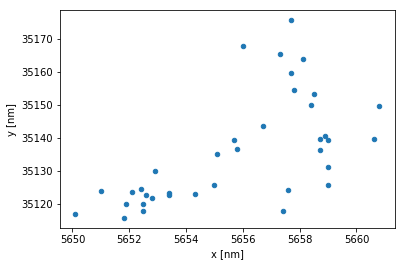

In [4]:
display(widgets.channelSelector, widgets.clusterSelector, widgets.visClusterButton)

def updateCluster(event):
    widgets.clusterSelector.options =list(locDataSet[int(widgets.channelSelector.value)-1].clusterArray())

def visCluster(event):
    widgets.clearOutput()
    display(widgets.channelSelector, widgets.clusterSelector, widgets.visClusterButton)
    locDataSet[int(widgets.channelSelector.value)-1].plotCluster(widgets.clusterSelector.value)

widgets.channelSelector.observe(updateCluster)
widgets.visClusterButton.on_click(visCluster)

## Filter Fiducials

In [5]:
display(widgets.x_filter,
        widgets.y_filter,
        widgets.stdX_filter,
        widgets.stdY_filter,
        widgets.int_filter,
        widgets.area_filter,
        widgets.filterButton)

def filterFiducialDataSet(event):
    fiducialDataSet.filterDataFrame(minX = widgets.min_x_filter_text.value,
                                    maxX = widgets.max_x_filter_text.value,
                                    minStdX = widgets.min_stdX_filter_text.value,
                                    maxStdX = widgets.max_stdX_filter_text.value,
                                    minY = widgets.min_y_filter_text.value,
                                    maxY = widgets.max_y_filter_text.value,
                                    minStdY = widgets.min_stdY_filter_text.value,
                                    maxStdY = widgets.max_stdY_filter_text.value,
                                    minInt = widgets.min_int_filter_text.value,
                                    maxInt = widgets.max_int_filter_text.value,
                                    minArea = widgets.min_area_filter_text.value,
                                    maxArea = widgets.max_area_filter_text.value,
                                   )
    

widgets.filterButton.on_click(filterFiducialDataSet)

Button(description='Filter Fiducials', icon='check', style=ButtonStyle(), tooltip='Click me')

## Visualize Fudicials

Button(description='plot fiducials', icon='check', style=ButtonStyle(), tooltip='Click me')

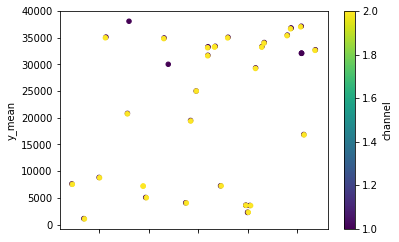

In [6]:
display(widgets.visFiducialButton, widgets.shift)

def translate(event):
    fiducialDataSet.dx = widgets.x_shift_float.value
    fiducialDataSet.dy = widgets.y_shift_float.value
    

def visualizeFiducials(event):
    widgets.clearOutput()
    display(widgets.visFiducialButton, widgets.shift)
    fiducialDataSet.trnaslateChannel2()
    fiducialDataSet.plotFiducials()
    

widgets.visFiducialButton.on_click(visualizeFiducials)
widgets.x_shift_float.observe(translate)
widgets.y_shift_float.observe(translate)

## Create affine transformation matrix

BoundedIntText(value=250, description='distance threshold [nm]', max=1000, style=DescriptionStyle(description_…

Button(description='create matrix', icon='check', style=ButtonStyle(), tooltip='Click me')

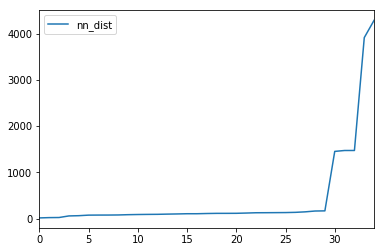

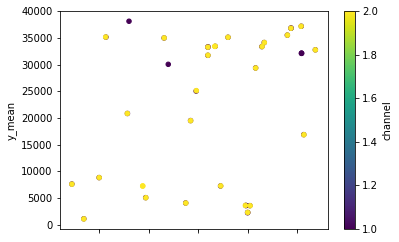

In [7]:
display(widgets.thr_dist, widgets.matrixButton)

def createMatrix(event):
    widgets.clearOutput()
    display(widgets.thr_dist, widgets.matrixButton)
    fiducialDataSet.sortFiducials()
    fiducialDataSet.createAffineMatrix()
    fiducialDataSet.affineTransformation()
    
widgets.matrixButton.on_click(createMatrix)

## Save affine transformation matrix

In [8]:
display(widgets.outFilePrefix, widgets.saveButton)

def saveMatrix(event):
    widgets.clearOutput()
    display(widgets.outFilePrefix, widgets.saveButton)
    fiducialDataSet.saveAffineMatrix(widgets.outFilePrefix.value)
    
widgets.saveButton.on_click(saveMatrix)

Text(value='channel2', description='file prefix', placeholder='channel2', style=DescriptionStyle(description_w…

Button(description='save matrix', icon='check', style=ButtonStyle(), tooltip='Click me')

saved affine matrix to: E:/Lehre/Praktikanten/Trung/beads/locs_right_channel2_matrix.csv
